In [1]:
# Initial imports
import pandas as pd
from path import Path
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# We will start importing the 25M MovieLens Dataset which has been downloaded from https:/grouplens.org/movielens
# The first file is the list of movies
file_path = Path('movies.csv')
movies_df = pd.read_csv(file_path)
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_df.shape

(62423, 3)

In [4]:
# We see that there are ~62k movies in this dataframe.  
movies_df.movieId.count()

62423

In [5]:
# Now lets import the movie ratings file
file_path2 = Path('ratings.csv')
ratings_df = pd.read_csv(file_path2)
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
# how many ratings for each movie 
ratingscounts_df=ratings_df.groupby('movieId').count()

In [7]:
ratingscounts_df.head()

,userId,rating,timestamp
movieId,,,
1,57309,57309,57309
2,24228,24228,24228
3,11804,11804,11804
4,2523,2523,2523
5,11714,11714,11714


In [8]:
# we can see that 13k movies were rated more than 50 times 
ratingscounts_df.loc[ratingscounts_df['userId']>50]

,userId,rating,timestamp
movieId,,,
1,57309,57309,57309
2,24228,24228,24228
3,11804,11804,11804
4,2523,2523,2523
5,11714,11714,11714
...,...,...,...
205076,53,53,53
205383,252,252,252
205425,69,69,69


In [13]:
df=pd.merge(ratings_df,movies_df,on='movieId',how='left')

In [14]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance


In [19]:
# are users sticking to similar movies if they rate them high?
df.loc[(df['userId']==57309) & (df['rating']>4) & (df['genres'].str.contains('Action'))]

,userId,movieId,rating,timestamp,title,genres
8785707,57309,6,4.5,1272246088,Heat (1995),Action|Crime|Thriller
8785725,57309,541,5.0,1272245873,Blade Runner (1982),Action|Sci-Fi|Thriller
8785760,57309,1201,4.5,1272245826,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western
8785763,57309,1208,5.0,1272243092,Apocalypse Now (1979),Action|Drama|War
8785764,57309,1209,4.5,1272243589,Once Upon a Time in the West (C'era una volta ...,Action|Drama|Western
8785779,57309,1262,4.5,1272245988,"Great Escape, The (1963)",Action|Adventure|Drama|War
8785783,57309,1287,5.0,1272241698,Ben-Hur (1959),Action|Adventure|Drama
8785798,57309,2019,5.0,1272243617,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama
8785811,57309,2728,4.5,1272242745,Spartacus (1960),Action|Drama|Romance|War
8785818,57309,2951,4.5,1272244879,"Fistful of Dollars, A (Per un pugno di dollari...",Action|Western


In [21]:
# are users sticking to similar movies if they rate them high?
df.loc[(df['userId']==57309) & (df['rating']>4) & (df['genres'].str.contains('Comedy'))]

,userId,movieId,rating,timestamp,title,genres
8785720,57309,308,5.0,1272244997,Three Colors: White (Trzy kolory: Bialy) (1994),Comedy|Drama
8785728,57309,608,5.0,1272243498,Fargo (1996),Comedy|Crime|Drama|Thriller
8785730,57309,665,4.5,1272244348,Underground (1995),Comedy|Drama|War
8785731,57309,750,4.5,1272243704,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
8785734,57309,899,5.0,1272245900,Singin' in the Rain (1952),Comedy|Musical|Romance
8785755,57309,1175,4.5,1272244293,Delicatessen (1991),Comedy|Drama|Romance
8785772,57309,1234,5.0,1272243861,"Sting, The (1973)",Comedy|Crime
8785781,57309,1273,5.0,1272244442,Down by Law (1986),Comedy|Drama|Film-Noir
8785793,57309,1732,4.5,1272246004,"Big Lebowski, The (1998)",Comedy|Crime
8785814,57309,2843,4.5,1272243695,"Black Cat, White Cat (Crna macka, beli macor) ...",Comedy|Romance


In [35]:
# are users sticking to similar movies if they rate them high?
df.loc[(df['userId']==57309) & (df['rating']>4) & (df['genres'].str.contains('Crime'))]

,userId,movieId,rating,timestamp,title,genres
8785707,57309,6,4.5,1272246088,Heat (1995),Action|Crime|Thriller
8785708,57309,16,4.5,1272246021,Casino (1995),Crime|Drama
8785712,57309,50,4.5,1272242876,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
8785714,57309,97,4.5,1272244391,"Hate (Haine, La) (1995)",Crime|Drama
8785716,57309,111,4.5,1272243357,Taxi Driver (1976),Crime|Drama|Thriller
8785727,57309,593,5.0,1272243622,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
8785728,57309,608,5.0,1272243498,Fargo (1996),Comedy|Crime|Drama|Thriller
8785733,57309,858,5.0,1272242617,"Godfather, The (1972)",Crime|Drama
8785746,57309,1084,4.5,1272245895,Bonnie and Clyde (1967),Crime|Drama
8785747,57309,1089,4.5,1272243824,Reservoir Dogs (1992),Crime|Mystery|Thriller


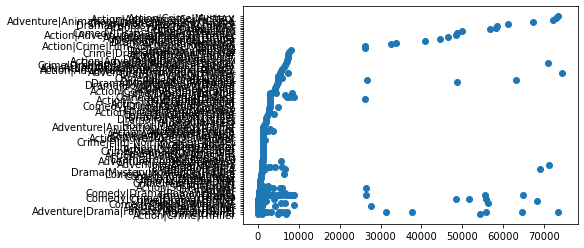

In [28]:
x_axis=df.loc[(df['userId']==57309)].movieId
y_axis=df.loc[(df['userId']==57309)].genres
plt.scatter(x_axis,y_axis)




In [37]:
dfg=df.groupby(['genres','userId']).mean('rating')
dfg.head()

movieId    rating     timestamp
genres             userId                                  
(no genres listed) 3       122896.0  3.500000  1.566091e+09
                   84      163523.0  3.833333  1.535494e+09
                   181     162867.5  3.250000  1.547805e+09
                   187     176601.0  5.000000  1.529121e+09
                   208     160378.0  5.000000  1.466447e+09

In [40]:
dfg.reset_index(inplace=True)

In [42]:
dfg.head()

,genres,userId,movieId,rating,timestamp
0,(no genres listed),3,122896.0,3.500000,1.566091e+09
1,(no genres listed),84,163523.0,3.833333,1.535494e+09
2,(no genres listed),181,162867.5,3.250000,1.547805e+09
3,(no genres listed),187,176601.0,5.000000,1.529121e+09
4,(no genres listed),208,160378.0,5.000000,1.466447e+09


In [58]:
dfg.to_csv('genres_userid_avgrating.csv')

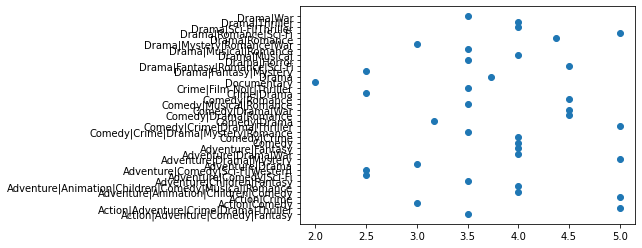

In [57]:
# how many different genres did user 3 rate.
x_axis=dfg.loc[dfg['userId']==1].rating
y_axis=dfg.loc[dfg['userId']==1].genres
plt.scatter(x_axis,y_axis)

In [48]:
genresarray=dfg.genres.unique()

In [49]:
# how many unique combinations of genres result
genresarray.shape

(1621,)

In [53]:
# how many movies were rated by each user on average
df.groupby('userId').count()

,movieId,rating,timestamp,title,genres
userId,,,,,
1,70,70,70,70,70
2,184,184,184,184,184
3,656,656,656,656,656
4,242,242,242,242,242
5,101,101,101,101,101
...,...,...,...,...,...
162537,101,101,101,101,101
162538,154,154,154,154,154
162539,47,47,47,47,47
